In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math
from scipy.interpolate import interp1d
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.mlab import griddata
from datetime import datetime
from scipy import stats


In [3]:
capT = 1000
Input_H = [1500,0,0,0]
parameters = [Input_H, capT] 

β = 0.1
μ1 = 1/21 #14 days infectious
μ2 = 1/5 #5 days (14 - 9 days)
σ =1/5 #5 days exposed
ϵ = 0.00001


In [4]:
def gillespieSEIR_season(initial, beta, mu1,mu2, sigma,epsilon):
    event_time = []
    pop = []
    N = sum(initial)
    pop.append(initial)
    event_time.append(0)
    times = 0
    ind = 0
    year = 1
    cuminf = []
    cuminf.append(0)
    events = []
    num_external= 0
    num_internal = 0
    Rtotal = 1
    while Rtotal>0:
#         print(Rtotal)
        state = np.zeros(shape= (4,12))
        
        ############################### Seasonality #######################################
        if np.round(times)%365 <= 120:
            E = epsilon
        else:
            E = 0
        ####################################################################################
        #################################### EVENTS ########################################
        ####################################################################################    
        
        R_external = E*pop[ind][0]
        state[:,0] = [-1,1,0,0]
        
        R_se = beta*(pop[ind][0])*(pop[ind][2])/N  
        state[:,1] = [-1, 1, 0, 0]
        
        R_ei = sigma*pop[ind][1]
        state[:,2] = [0, -1, 1, 0]
        

        
        R_ir = mu2*pop[ind][2]
        state[:,3] = [0,0,-1,1]
        

        R_is = mu1*pop[ind][2]
        state[:,4] = [1,0,-1,0]
        

########################## RATES ##############################
        rate = [R_external, R_se, R_ei,  R_ir,  R_is]
#                 , R_sb, R_sd, R_ed, R_id]

        Rtotal = sum(rate)

        delta_t= -np.log(np.random.uniform(0,1))/Rtotal
        P = np.random.uniform(0,1)*Rtotal
        
        if Rtotal>0:
            times =times+ delta_t
            event = np.min(np.where(P<=np.cumsum(rate)))
            events.append(event)
            event_time.append(times)
            pop.append(pop[ind]+state[:,event])
#             print(cuminf)
            if event == 0:
                num_external +=1
            if event == 1:
                num_internal +=1
            if event == 2:
                cuminf.append(1 +cuminf[ind] )
            else:
                cuminf.append(0 +cuminf[ind])
            ind=ind+1
#         print(pop[ind])
        N = sum(pop[ind][:2])
    return event_time, np.array(pop), events, cuminf, num_external, num_internal

In [5]:
Input_H = [1500, 0, 0, 0]
Input_H[:3]
Gh_season = gillespieSEIR_season(Input_H, β, μ1, μ2, σ, ϵ)
SEIHRt_s = Gh_season[0]
SEIHRs_s = Gh_season[1][:,0]
SEIHRe_s = Gh_season[1][:,1]
SEIHRi_s = Gh_season[1][:,2]
# SEIHRh_s = Gh_season[1][:,3]
SEIHRr_s = Gh_season[1][:,3]

/home/emma/.local/lib/python3.5/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in double_scalars


In [5]:
Gh_season[5]/Gh_season[3][-1]

0.0

In [6]:
manhes = []
manhts = []
manhhs = []
manhis = []
manhss = []
manhrs = []
cuminf = []
# manhts.append((0,0))
for ind, x in enumerate(SEIHRt_s):
#     ind = ind +1
    if ind<len(SEIHRt_s)-1:
        manhes.append((SEIHRe_s[ind], SEIHRe_s[ind]))
#         manhhs.append((SEIHRh_s[ind], SEIHRh_s[ind]))
        manhis.append((SEIHRi_s[ind], SEIHRi_s[ind]))
        manhss.append((SEIHRs_s[ind], SEIHRs_s[ind]))
        manhrs.append((SEIHRr_s[ind], SEIHRr_s[ind]))
        manhts.append((SEIHRt_s[ind], SEIHRt_s[ind+1]))
        cuminf.append((Gh_season[3][ind], Gh_season[3][ind]))

    else:
        manhes.append((SEIHRe_s[ind], SEIHRe_s[ind]))
#         manhhs.append((SEIHRh_s[ind], SEIHRh_s[ind]))
        manhis.append((SEIHRi_s[ind], SEIHRi_s[ind]))
        manhss.append((SEIHRs_s[ind], SEIHRs_s[ind]))
        manhrs.append((SEIHRr_s[ind], SEIHRr_s[ind]))
        manhts.append((SEIHRt_s[ind], SEIHRt_s[ind]))
        cuminf.append((Gh_season[3][ind], Gh_season[3][ind]))


manhes = np.array(manhes).flatten()
manhts = np.array(manhts).flatten()
manhss = np.array(manhss).flatten()
manhrs = np.array(manhrs).flatten()
cuminf = np.array(cuminf).flatten()
manhis = np.array(manhis).flatten()
# manhts = np.insert(manhts, -1, manhts[-1])
# manhts = np.insert(manhts, 0, manhts[0])
# manhts

In [7]:
manhts

array([  0.        ,   8.12332243,   8.12332243,  11.40654459,
        11.40654459,  19.62291141,  19.62291141, 117.0493951 ,
       117.0493951 , 123.73348419, 123.73348419, 127.47121423,
       127.47121423, 127.47121423])

([<matplotlib.axis.XTick at 0x7f93a82260b8>,
 <a list of 5 Text xticklabel objects>)

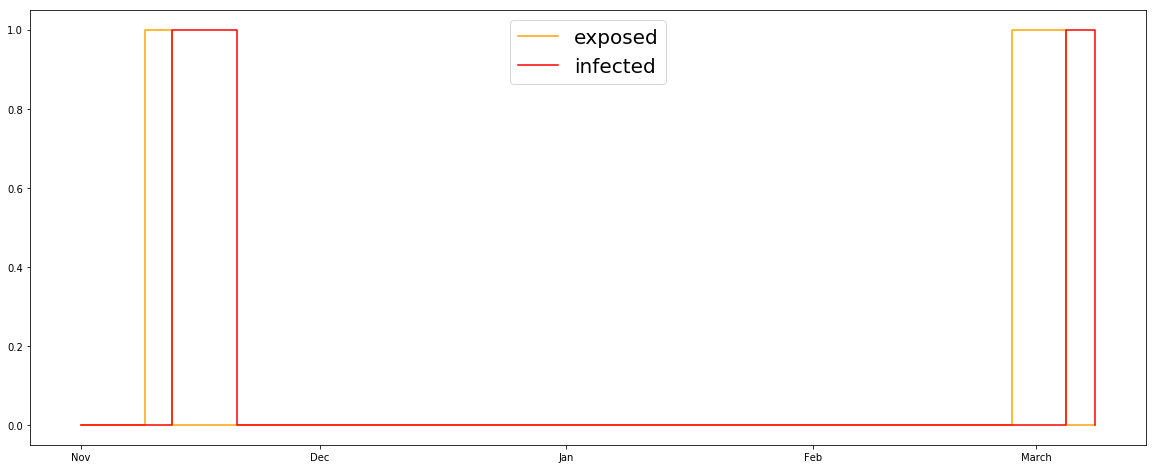

In [8]:
N = sum(Input_H)
plt.figure(figsize = (20,8))
# plt.plot(SEIHRt, SEIHRr/Nn,c='blue', label = 'removed')
plt.plot(manhts, manhes,c='orange', label = 'exposed')
# plt.plot(manhts, manhhs/Nn,c='magenta', label = 'hospital')

# plt.plot(manhts,manhrs/Nn, c='yellowgreen',label = 'susceptible')
plt.plot(manhts,manhis,c= 'r', label = 'infected')
plt.legend(fontsize = 20)
# plt.xlim([120,150])
plt.xticks([0,30, 30+31, 30+31+31, 30+31+31+28
           ], ['Nov','Dec', 'Jan', 'Feb', 'March'])

([<matplotlib.axis.XTick at 0x7f93a5e76eb8>,
 <a list of 5 Text xticklabel objects>)

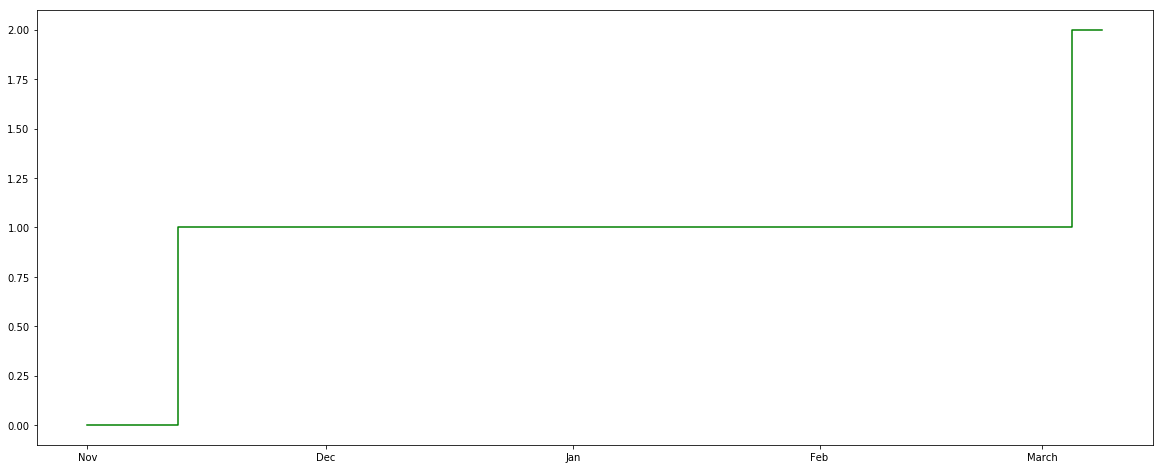

In [9]:
plt.figure(figsize = (20,8))
plt.plot(manhts, cuminf, color = 'green')
plt.xticks([0,30, 30+31, 30+31+31, 30+31+31+28
           ], ['Nov','Dec', 'Jan', 'Feb', 'March'])

# Perform ABC on 2004 data

In [12]:
Data_F10=pd.read_csv("../../Case_data/2010_faridpur_cases.csv",sep = ',', header = 0)
############################# Spacing ##############################################
date_format = "%d/%m/%y"


def Spacing(dataset):
    record = []
    record.append(datetime.strptime(dataset['Date'][0], date_format).day)
    for i in range(1, len(dataset)):
        record.append(record[i-1]+(datetime.strptime(dataset['Date'][i], date_format)-datetime.strptime(dataset['Date'][i-1], date_format)).days)
    start_day = (datetime.strptime(dataset['Date'].values[0], date_format)-datetime.strptime('01/11/09', date_format)).days
    record = [int(a - record[0]) for a in record]
    record = [int(a +start_day) for a in record]

    return record

Rec_F10=Spacing(Data_F10)
summary = np.array([Rec_F10, Data_F10['CumsumInf'].values])

# Initial Tolerance 

In [162]:

M =gillespieSEIR_season(Input_H, β, μ1, μ2, σ, ϵ)
time = [] #make results of M a step function
cuminf = [] #steps
infections = []
for ind, x in enumerate(M[0]):
    if ind < len(M[0])-1:
        time.append((M[0][ind], M[0][ind+1]))
        cuminf.append((M[3][ind], M[3][ind]))
        infections.append((M[1][:,2][ind], M[1][:,2][ind]))
    else:
        time.append((M[0][ind], M[0][ind]))
        cuminf.append((M[3][ind], M[3][ind]))
        infections.append((M[1][:,2][ind], M[1][:,2][ind]))

time2 = np.array(time).flatten()
time = np.array(time).flatten()

cuminf = np.array(cuminf).flatten()
max_inf = max(cuminf)
max_time = math.ceil(max(time))
#     print(max_inf, max_time, βt, ɛt)


summary_time = summary[0]
#         print(summary_time, max(summary_time[0]), max_time)
summary_cum = summary[1]
if max_time> max(summary_time):
    length1 =  np.arange(max(summary_time), max_time +1, 1)
    summary_time = np.append(summary_time, length1)
#         print(summary_time, len( length1))
    summary_cum = np.append(summary_cum, max(summary[1])*np.ones(len(length1 )))
#         print(summary_cum)
if max_time < max(summary_time):
    length2 = np.arange(max_time, max(summary_time)+1, 1)
    time = np.append(time,length2)
    cuminf = np.append(cuminf, max_inf*np.ones(len(length2)))
inter_t = np.arange(0, max(summary_time) +1 , 1) #interpolate to daily steps
inter_cum = np.interp(inter_t, time,cuminf) #daily steps

print(np.linalg.norm(summary_cum-inter_cum[summary_time]))

9.16515138991168


/home/emma/.local/lib/python3.5/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in double_scalars


In [165]:
print(M[4]/M[3][-1], M[5]/M[3][-1])

0.4166666666666667 0.5833333333333334


In [127]:
inter_t = [  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150]
inter_cum =[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  3.,  3.,  3.,  3.,  3.,  4.,  4.,  4.,  4.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  6.,  6.,
        6.,  6.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  8.,  8.,
        9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,
        9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,
        9.,  9.,  9.,  9.,  9.,  9.,  9., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10.]
inter_cum = np.array(inter_cum, dtype = int)

In [128]:
np.linalg.norm(summary_cum-inter_cum[summary_time])

13.45362404707371

Text(0.5,1,'Initial tolerance = 9.17 \n with parameters β =0.1, σ =0.2, μ1 = 0.05, μ2 = 0.2 \n 42% external infections 58% human to human transmission')

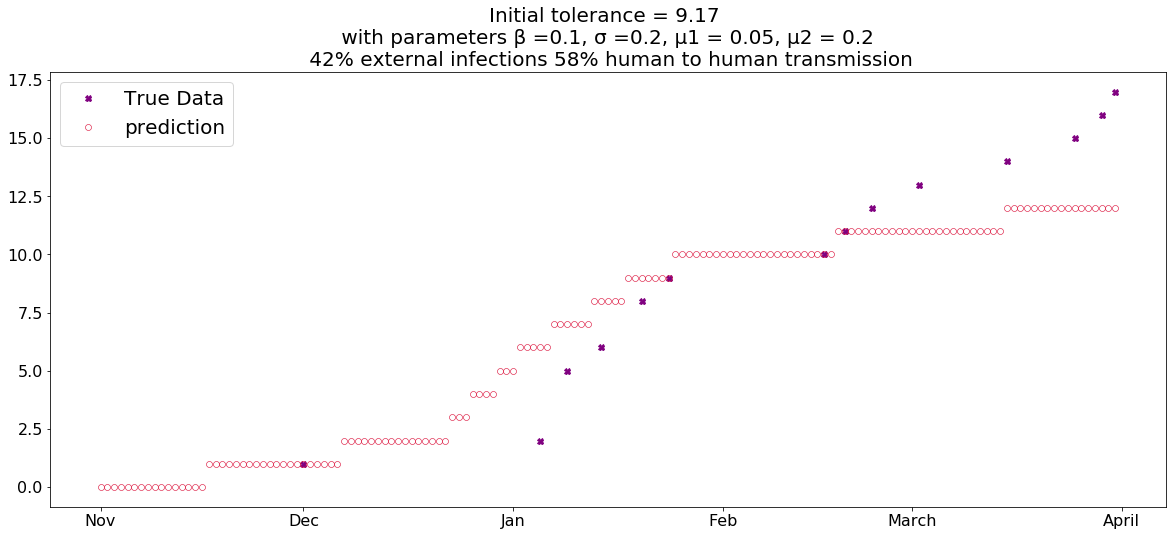

In [169]:
# datetime.strptime(d1, "%Y-%m-%d")
plt.figure(figsize = (20,8))
plt.plot(summary_time, summary_cum,  'X', color = 'purple', label = 'True Data')
plt.plot(inter_t, inter_cum, 'o',markeredgewidth=0.6, markeredgecolor='crimson',markerfacecolor='None', label = 'prediction')
plt.legend(fontsize = 20)
# plt.xlim([0, Rec_F04[-1]+4])
# plt.ylim([0,100])
plt.xticks([0,30, 30+31, 30+31+31, 30+31+31+28, 30+31+31+28+31
           ], ['Nov','Dec', 'Jan', 'Feb', 'March', 'April'], fontsize = 16)
plt.yticks(fontsize = 16)
plt.title('Initial tolerance = {} \n with parameters β ={}, σ ={}, μ1 = {}, μ2 = {} \n {}% external infections {}% human to human transmission'.format(round(np.linalg.norm(summary_cum-inter_cum[summary_time]),2), β, σ, round(μ1,2), μ2, round(100*M[4]/M[3][-1]), round(100*M[5]/M[3][-1])  ), fontsize = 20)

([<matplotlib.axis.XTick at 0x7f93a4f42518>,
 <a list of 6 Text xticklabel objects>)

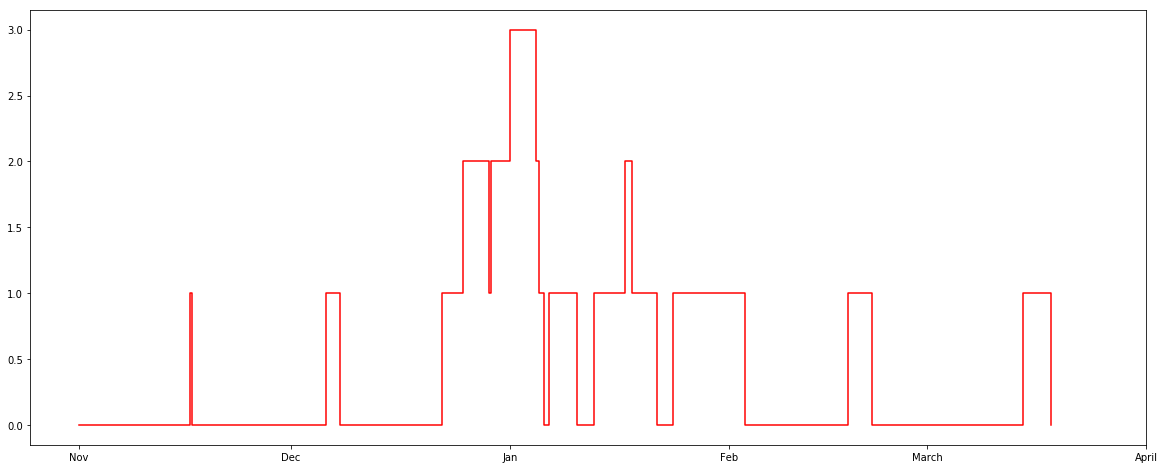

In [170]:
infections = np.array(infections).flatten()
# len(infections)
# N = sum(Input_H)
plt.figure(figsize = (20,8))
# # plt.plot(SEIHRt, SEIHRr/Nn,c='blue', label = 'removed')
plt.plot(time2, infections,c='r', label = 'infected')
# # plt.plot(manhts, manhhs/Nn,c='magenta', label = 'hospital')

# # plt.plot(manhts,manhrs/Nn, c='yellowgreen',label = 'susceptible')
# # plt.plot(manhts,manhis,c= 'r', label = 'infected')
# plt.legend(fontsize = 20)
# # plt.xlim([120,150])
plt.xticks([0,30, 30+31, 30+31+31, 30+31+31+28, 30+31+31+28+31
           ], ['Nov','Dec', 'Jan', 'Feb', 'March', 'April'])

# ABC

In [171]:
N = 50
tol = 21
t = 0 
θ = []

β1, ɛ1, σ1, μ11,μ21 =  [np.random.uniform(0,0.1, N), np.random.uniform(0,0.001, N),
                     1/np.random.uniform(1,30, N), 1/np.random.uniform(1, 40, N),
                     1/np.random.uniform(1,40, N)]
#     print(np.array([β1, ɛ1, p1 ]))

θ = [np.array([β1, ɛ1, σ1, μ11, μ21]).T]
# print(θ[0][:,0])
t = 1
θ_t = []
tols = []
tols.append(tol)
error = []
while t< 6:
    r_β = np.random.randint(0, N-1)
    r_ϵ = np.random.randint(0,N-1)
    r_σ= np.random.randint(0,N-1)
    r_μ1 = np.random.randint(0,N-1)
    r_μ2 = np.random.randint(0,N-1)
    δ = np.random.uniform(0, 1e-3)
    βt, ɛt, σt, μ1t, μ2t = θ[t-1][:,0][r_β] +δ, θ[t-1][:,1][r_ϵ] +δ,θ[t-1][:,2][r_σ] + δ, θ[t-1][:,3][r_μ1] +δ, θ[t-1][:,4][r_μ2] +δ

    M =gillespieSEIR_season(Input_H, βt, μ1t,μ2t,σt,ɛt)
    time = [] #make results of M a step function
    cuminf = [] #steps
    for ind, x in enumerate(M[0]):
        if ind < len(M[0])-1:
            time.append((M[0][ind], M[0][ind+1]))
            cuminf.append((M[3][ind], M[3][ind]))
        else:
            time.append((M[0][ind], M[0][ind]))
            cuminf.append((M[3][ind], M[3][ind]))
    time = np.array(time).flatten()
    cuminf = np.array(cuminf).flatten()
    max_inf = max(cuminf)
    max_time = math.ceil(max(time))
#     print(max_inf, max_time, βt, ɛt)
    

    summary_time = summary[0]
#         print(summary_time, max(summary_time[0]), max_time)
    summary_cum = summary[1]
    if max_time> max(summary_time):
        length1 =  np.arange(max(summary_time), max_time +1, 3)
        summary_time = np.append(summary_time, length1)
#         print(summary_time, len( length1))
        summary_cum = np.append(summary_cum, max(summary[1])*np.ones(len(length1 )))
#         print(summary_cum)
    if max_time < max(summary_time):
        length2 = np.arange(max_time, max(summary_time)+1, 3)
        time = np.append(time,length2)
        cuminf = np.append(cuminf, max_inf*np.ones(len(length2)))
        
    inter_t = np.arange(0, max(summary_time) +1 , 1) #interpolate to daily steps
    inter_cum = np.interp(inter_t, time,cuminf) #daily steps
    
#         print(summary_time, summary_cum)
#     print(np.linalg.norm(summary_cum-inter_cum[summary_time]), βt, ɛt, pt)
    if np.linalg.norm(summary_cum-inter_cum[summary_time]) <tol:
        θ_t.append(np.array([βt, ɛt, σt, μ1t, μ2t]))
        print(len(θ_t), t, tol, np.linalg.norm(summary_cum-inter_cum[summary_time]))
#             θ_t = np.array(θ_t)
#             print(θ_t)
        error.append(np.linalg.norm(summary_cum-inter_cum[summary_time]))
    if len(θ_t) == N:
        tol = np.median(error)
        tols.append(tol)
        θ_t = np.array(θ_t)
        print(θ_t)
        θ.append(θ_t)
        t +=1 
        θ_t = []
        error = []

/home/emma/.local/lib/python3.5/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in double_scalars
/home/emma/.local/lib/python3.5/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


1 1 21 10.723805294763608
2 1 21 20.396078054371138
3 1 21 15.0996688705415
4 1 21 13.564659966250536
5 1 21 17.916472867168917
6 1 21 17.635192088548397
7 1 21 19.390719429665317
8 1 21 15.132745950421556
9 1 21 14.142135623730951
10 1 21 18.65475810617763
11 1 21 11.74734012447073
12 1 21 20.639767440550294
13 1 21 19.6468827043885
14 1 21 11.357816691600547
15 1 21 18.384776310850235
16 1 21 9.273618495495704
17 1 21 20.0
18 1 21 20.639767440550294
19 1 21 8.94427190999916
20 1 21 10.344080432788601
21 1 21 10.908712114635714
22 1 21 11.269427669584644
23 1 21 8.602325267042627
24 1 21 7.745966692414834
25 1 21 11.575836902790225
26 1 21 7.0
27 1 21 8.246211251235321
28 1 21 12.609520212918492
29 1 21 20.639767440550294
30 1 21 7.416198487095663
31 1 21 9.16515138991168
32 1 21 14.035668847618199
33 1 21 20.174241001832016
34 1 21 15.459624833740307
35 1 21 11.832159566199232
36 1 21 13.856406460551018
37 1 21 14.7648230602334
38 1 21 6.928203230275509
39 1 21 5.830951894845301
40 1

1 3 8.48528137423857 7.0710678118654755
2 3 8.48528137423857 6.708203932499369
3 3 8.48528137423857 7.615773105863909
4 3 8.48528137423857 6.782329983125268
5 3 8.48528137423857 6.164414002968976
6 3 8.48528137423857 8.366600265340756
7 3 8.48528137423857 7.416198487095663
8 3 8.48528137423857 7.0710678118654755
9 3 8.48528137423857 5.830951894845301
10 3 8.48528137423857 8.306623862918075
11 3 8.48528137423857 8.12403840463596
12 3 8.48528137423857 8.0
13 3 8.48528137423857 5.196152422706632
14 3 8.48528137423857 6.4031242374328485
15 3 8.48528137423857 8.306623862918075
16 3 8.48528137423857 7.0
17 3 8.48528137423857 8.306623862918075
18 3 8.48528137423857 8.306623862918075
19 3 8.48528137423857 5.830951894845301
20 3 8.48528137423857 8.06225774829855
21 3 8.48528137423857 7.681145747868608
22 3 8.48528137423857 6.4031242374328485
23 3 8.48528137423857 6.0
24 3 8.48528137423857 7.681145747868608
25 3 8.48528137423857 8.246211251235321
26 3 8.48528137423857 6.6332495807108
27 3 8.4852

1 5 5.873515838972459 5.5677643628300215
2 5 5.873515838972459 5.385164807134504
3 5 5.873515838972459 5.5677643628300215
4 5 5.873515838972459 4.123105625617661
5 5 5.873515838972459 5.291502622129181
6 5 5.873515838972459 5.0990195135927845
7 5 5.873515838972459 4.242640687119285
8 5 5.873515838972459 4.47213595499958
9 5 5.873515838972459 5.196152422706632
10 5 5.873515838972459 5.5677643628300215
11 5 5.873515838972459 4.69041575982343
12 5 5.873515838972459 2.8284271247461903
13 5 5.873515838972459 4.47213595499958
14 5 5.873515838972459 4.123105625617661
15 5 5.873515838972459 5.656854249492381
16 5 5.873515838972459 5.385164807134504
17 5 5.873515838972459 5.5677643628300215
18 5 5.873515838972459 5.5677643628300215
19 5 5.873515838972459 5.744562646538029
20 5 5.873515838972459 5.830951894845301
21 5 5.873515838972459 5.830951894845301
22 5 5.873515838972459 4.795831523312719
23 5 5.873515838972459 5.0990195135927845
24 5 5.873515838972459 5.196152422706632
25 5 5.8735158389724

In [198]:
# np.save('theta_Season_F10', θ)
# np.save('tols_Season_F10', tols)

In [173]:
# np.save('theta_SEIR', θ)
# np.save('tols_SEIR', tols)
len(θ[0][:,1])

50

/home/emma/.local/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


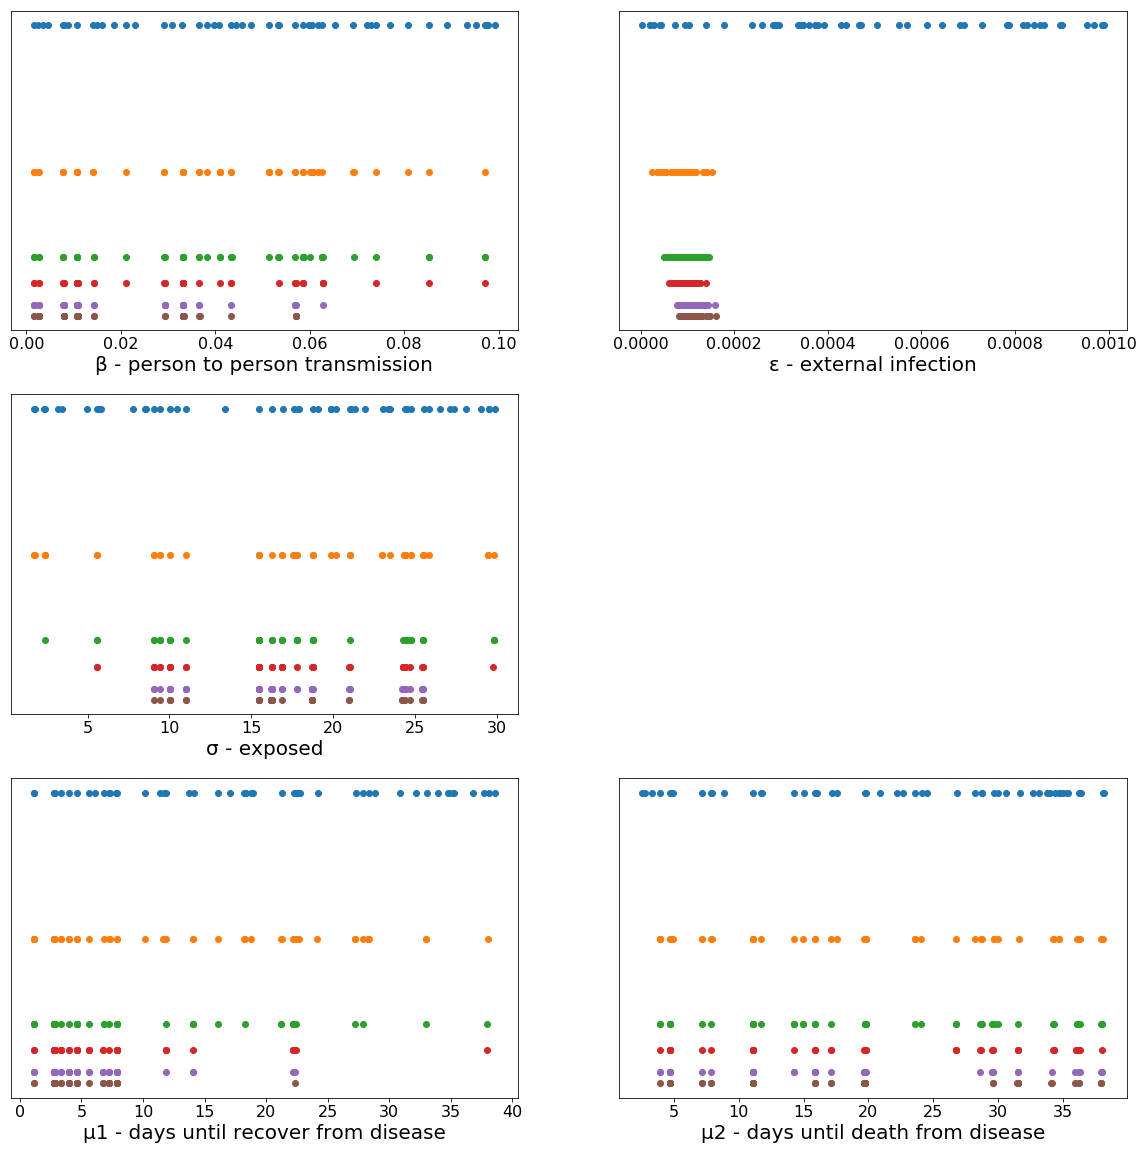

In [174]:
plt.figure(figsize = (20,20))
tol = 6
for i in range(6):
    plt.subplot(3,2,1)
    plt.plot(θ[i][:,0], tols[i]*np.ones(50), 'o' )
    plt.xlabel('β - person to person transmission', fontsize = 20)
    plt.yticks([])
    plt.xticks(fontsize = 16)
    
    plt.subplot(3,2,2)
    plt.plot(θ[i][:,1], tols[i]*np.ones(50), 'o' )
    plt.xlabel('ɛ - external infection', fontsize = 20)
    plt.yticks([])
    plt.xticks(fontsize = 16)

    plt.subplot(3,2,3)
    plt.plot([1/a for a in θ[i][:,2]], tols[i]*np.ones(50), 'o' )
    plt.xlabel('σ - exposed', fontsize = 20)
    plt.yticks([])
    plt.xticks(fontsize = 16)

    plt.subplot(3,2,5)
    plt.plot([1/b for b in θ[i][:,3]] , tols[i]*np.ones(50), 'o' )
    plt.xlabel('μ1 - days until recover from disease', fontsize = 20)
    plt.yticks([])        
    plt.xticks(fontsize = 16)

    plt.subplot(3,2,6)
    plt.plot([1/b for b in θ[i][:,4]] , tols[i]*np.ones(50), 'o' )
    plt.xlabel('μ2 - days until death from disease', fontsize = 20)
    plt.yticks([])        
    plt.xticks(fontsize = 16)
    
#     tol -=1

/home/emma/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([-20., -10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 <a list of 9 Text xticklabel objects>)

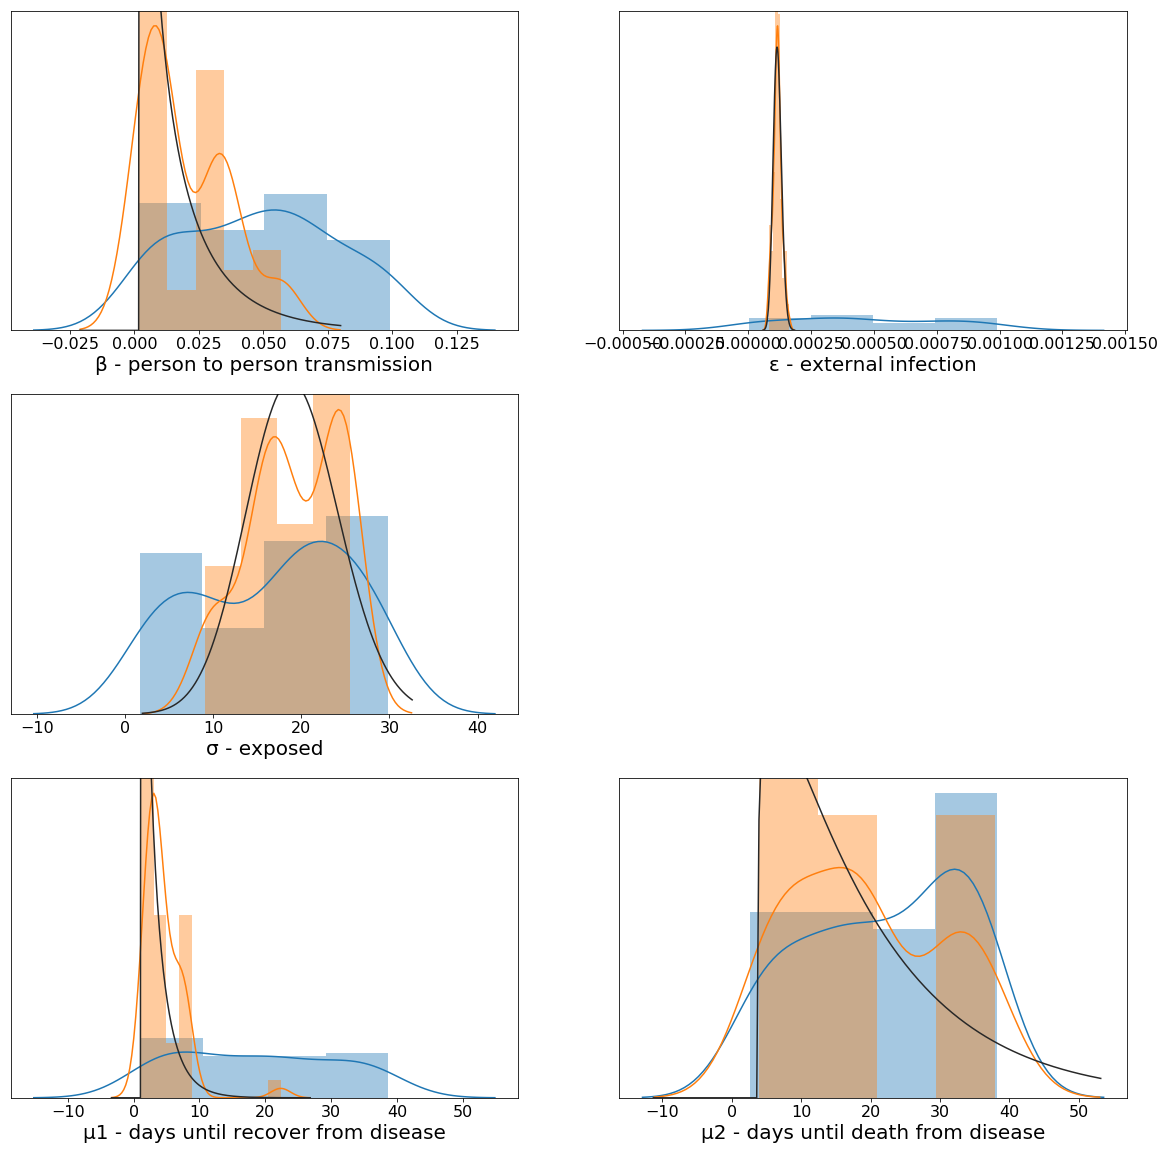

In [175]:
plt.figure(figsize = (20,20))

plt.subplot(3,2,1)
#     plt.plot(θ[i][:,0], tols[i]*np.ones(50), 'o' )
sns.distplot(θ[0][:,0],  kde=True,  norm_hist=False, label = 'Prior')
sns.distplot(θ[5][:,0],  kde=True,  norm_hist=False, fit=stats.gamma, label = 'Posterior')
plt.xlabel('β - person to person transmission', fontsize = 20)
plt.yticks([])
plt.xticks(fontsize = 16)

plt.subplot(3,2,2)
#     plt.plot(θ[i][:,1], tols[i]*np.ones(50), 'o' )
sns.distplot(θ[0][:,1],  kde=True,  norm_hist=False, label = 'Prior')
sns.distplot(θ[5][:,1],  kde=True,  norm_hist=False, fit=stats.gamma, label = 'Posterior')
plt.xlabel('ɛ - external infection', fontsize = 20)
plt.yticks([])
plt.xticks(fontsize = 16)

plt.subplot(3,2,3)
#     plt.plot([1/a for a in θ[i][:,2]], tols[i]*np.ones(50), 'o' )
sns.distplot([1/a for a in θ[0][:,2]],  kde=True,  norm_hist=False, label = 'Prior')
sns.distplot([1/a for a in θ[5][:,2]],  kde=True,  norm_hist=False, fit=stats.gamma, label = 'Posterior')
plt.xlabel('σ - exposed', fontsize = 20)
plt.yticks([])
plt.xticks(fontsize = 16)

plt.subplot(3,2,5)
sns.distplot([1/a for a in θ[0][:,3]],  kde=True,  norm_hist=False, label = 'Prior')
sns.distplot([1/a for a in θ[5][:,3]],  kde=True,  norm_hist=False, fit=stats.gamma, label = 'Posterior')
plt.plot([1/b for b in θ[i][:,3]] , tols[i]*np.ones(50), 'o' )
plt.xlabel('μ1 - days until recover from disease', fontsize = 20)
plt.yticks([])        
plt.xticks(fontsize = 16)

plt.subplot(3,2,6)
#     plt.plot([1/b for b in θ[i][:,4]] , tols[i]*np.ones(50), 'o' )
sns.distplot([1/a for a in θ[0][:,4]],  kde=True,  norm_hist=False, label = 'Prior')
sns.distplot([1/a for a in θ[5][:,4]],  kde=True,  norm_hist=False, fit=stats.gamma, label = 'Posterior')
plt.xlabel('μ2 - days until death from disease', fontsize = 20)
plt.yticks([])        
plt.xticks(fontsize = 16)

# Test it

In [181]:
θ = np.load('theta_Season_F10.npy')

In [182]:
a_β, loc_β, scale_β = stats.gamma.fit(θ[5][:,0])
a_ϵ, loc_ϵ, scale_ϵ = stats.gamma.fit(θ[5][:,1])
a_σ, loc_σ, scale_σ = stats.gamma.fit([1/a for a in θ[5][:,2]])
a_μ1, loc_μ1, scale_μ1 = stats.gamma.fit([1/a for a in θ[5][:,3]])
a_μ2, loc_μ2, scale_μ2 = stats.gamma.fit([1/a for a in θ[5][:,4]])

In [183]:
timing = []
cumulative = []
for k in range(8000):
    beta = stats.gamma.rvs( a_β, loc_β, scale_β)
    mu1 = 1/stats.gamma.rvs( a_μ1, loc_μ1, scale_μ1)
    mu2 = 1/stats.gamma.rvs( a_μ2, loc_μ2, scale_μ2)
    epsilon = stats.gamma.rvs( a_ϵ, loc_ϵ, scale_ϵ)
    sigma = 1/stats.gamma.rvs( a_σ, loc_σ, scale_σ)
    M=gillespieSEIR_season(Input_H, beta, mu1,mu2,
                          sigma,epsilon)
#     r_β = np.random.randint(0, 49)
#     r_ϵ = np.random.randint(0,49)
#     r_σ = np.random.randint(0,49)
#     r_μ1 = np.random.randint(0,49)
#     r_μ2 = np.random.randint(0,49)
#     M=gillespieSEIR(parameters[0], betas[r_β], mus1[r_μ1],mus2[r_μ2],
#                           sigmas[r_σ],eps[r_ϵ],  parameters[6])
    time = [] #make results of M a step function
    cuminf = [] #steps
    for ind, x in enumerate(M[0]):
        if ind < len(M[0])-1:
            time.append((M[0][ind], M[0][ind+1]))
            cuminf.append((M[3][ind], M[3][ind]))
        else:
            time.append((M[0][ind], M[0][ind]))
            cuminf.append((M[3][ind], M[3][ind]))
    time = np.array(time).flatten()
    cuminf = np.array(cuminf).flatten()
    max_inf = max(cuminf)
    max_time = math.ceil(max(time))
    #     print(max_inf, max_time, βt, ɛt)


    summary_time = Rec_F10
    #         print(summary_time, max(summary_time[0]), max_time)
    summary_cum = Data_F10['CumsumInf'].values
    if max_time> max(summary_time):
        length1 =  np.arange(max(summary_time), max_time +1, 1)
        summary_time = np.append(summary_time, length1)
    #         print(summary_time, len( length1))
        summary_cum = np.append(summary_cum, max( Data_F10['CumsumInf'].values)*np.ones(len(length1 )))
    #         print(summary_cum)
    if max_time < max(summary_time):
        length2 = np.arange(max_time, max(summary_time)+1, 1)
        time = np.append(time,length2)
        cuminf = np.append(cuminf, max_inf*np.ones(len(length2)))

    inter_t = np.arange(0, max(summary_time) +1 , 1) #interpolate to daily steps
    inter_cum = np.interp(inter_t, time,cuminf) #daily steps
    timing.append(inter_t)
    cumulative.append(inter_cum)
    #         print(summary_time, summary_cum)
#     print(np.linalg.norm(summary_cum-inter_cum[summary_time]),  betas[r_β], mus1[r_μ1],mus2[r_μ2],
#                           sigmas[r_σ],eps[r_ϵ])
    

/home/emma/.local/lib/python3.5/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in double_scalars


(0, 100)

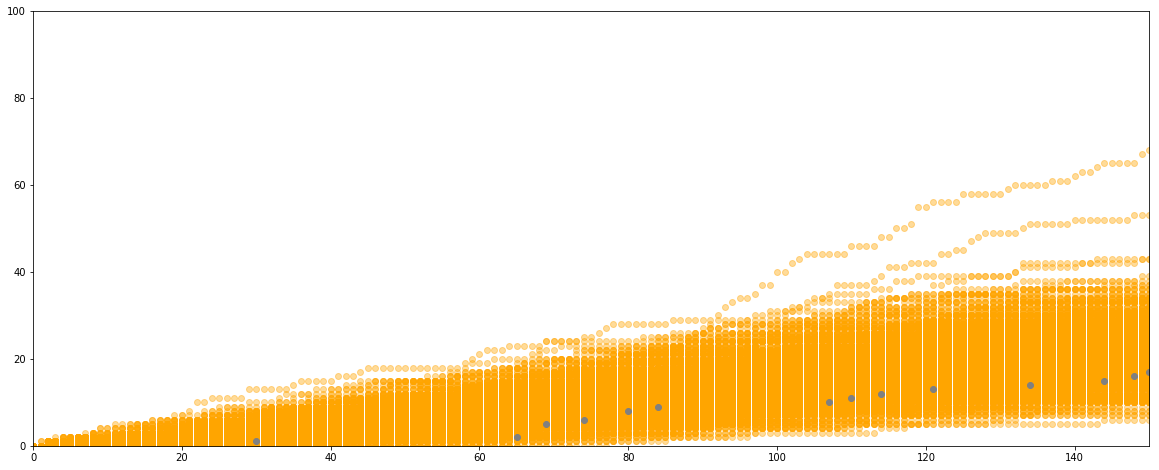

In [184]:
len_outbreak = Rec_F10[-1]
plt.figure(figsize = (20,8))
Num_sim = 1000
for j in range(Num_sim):
    plt.plot(timing[j], cumulative[j], 'o', color = 'orange', alpha = 0.4)

plt.plot(summary_time, summary_cum, 'o', color = 'grey')
plt.xlim([0,len_outbreak])
plt.ylim([0,100])

In [189]:
ma = []
for k in range(len(cumulative)):
    ma.append(len(cumulative[k]))
min(ma)

151

In [190]:
mat = np.zeros(shape=(Num_sim, max(ma)))
cumulative = np.array(cumulative)

In [191]:
for k in range(Num_sim):
    if len(cumulative[k]) < max(ma):
        mat[k,:] = np.concatenate([cumulative[k], cumulative[k][-1]*np.ones(max(ma) - len(cumulative[k]))])
    else:
#         print(len)
        mat[k,:] = cumulative[k]

In [192]:
# np.concatenate(cumulative[k], np.zeros(max(ma) - len(cumulative[k])))
# np.concatenate([np.arange(5), np.arange(6)])
# np.arange(5)
stats.mode(mat[:,-1])

ModeResult(mode=array([21.]), count=array([81]))

In [193]:
np.mean(mat, axis = 0)
import matplotlib.lines as mlines
stats.mode(mat, axis = 0)[0][0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  3.,  4.,  4.,
        4.,  3.,  3.,  4.,  4.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  6.,
        6.,  6.,  6.,  6.,  6.,  6.,  7.,  7.,  6.,  6.,  8.,  7.,  8.,
        8.,  8.,  8.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,
        9., 10., 12., 10., 12., 12., 12., 10., 12., 12., 12., 12., 12.,
       12., 12., 12., 12., 15., 12., 12., 12., 12., 12., 12., 15., 13.,
       17., 16., 17., 17., 17., 17., 14., 15., 15., 17., 18., 18., 15.,
       16., 16., 16., 17., 16., 16., 17., 18., 18., 18., 17., 18., 18.,
       18., 18., 17., 17., 17., 19., 19., 20., 19., 20., 19., 20., 20.,
       20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
       20., 20., 20., 20., 20., 21., 21., 21., 21., 20., 20., 20., 20.,
       21., 21., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20

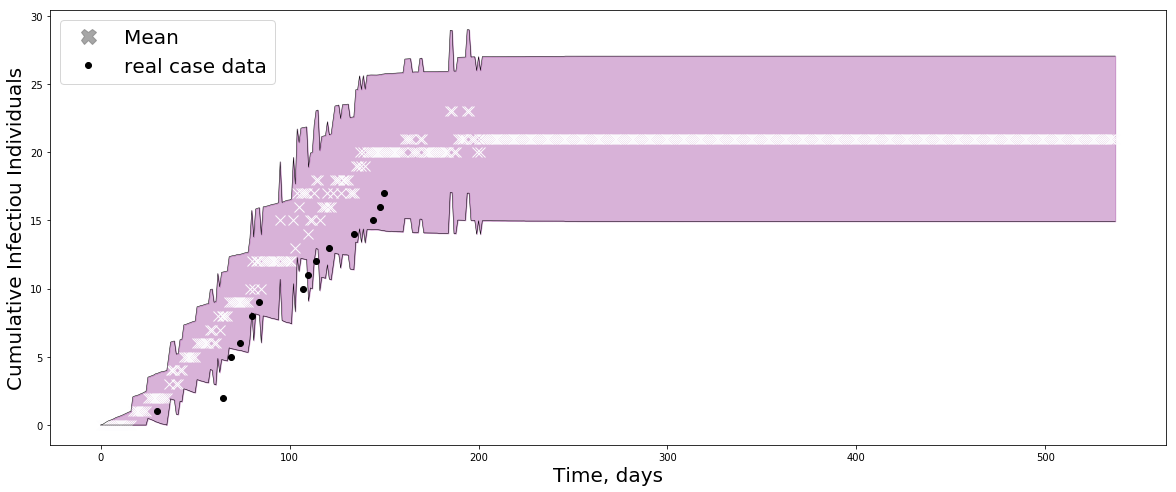

In [194]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(range(max(ma)), stats.mode(mat, axis = 0)[0][0], 'x', markersize = 10,linewidth = 6, color = '#fdfdfe', label = 'Mean')
plt.plot(range(max(ma)), (stats.mode(mat, axis = 0)[0][0]+np.std(mat, axis = 0)), color ='k', lw=0.5)
plt.plot(range(max(ma)), np.maximum((stats.mode(mat, axis = 0)[0][0]-np.std(mat, axis = 0)),0),color ='k', lw=0.5)
plt.fill_between(range(max(ma)),  (stats.mode(mat, axis = 0)[0][0]+np.std(mat, axis = 0)), np.maximum((stats.mode(mat, axis = 0)[0][0]-np.std(mat, axis = 0)),0), 1, alpha=0.3, color = 'purple')
true, = ax.plot(summary[0], summary[1], 'o', color = 'black', label = 'real case data')
# leg = ax.legend(fontsize = 20)
plt.ylabel('Cumulative Infectiou Individuals', fontsize = 20)
plt.xlabel('Time, days', fontsize = 20)

blue_line = mlines.Line2D([], [], color='grey', alpha = 0.7, marker='X',
                          markersize=15, linestyle = '', linewidth = 2,  label='Mean')
plt.legend(handles=[blue_line, true], fontsize = 20)
# leg.legendHandles[0].set_color('red')
# plt.xlim([0,200])

ValueError: x and y must have same first dimension, but have shapes (151,) and (1043,)

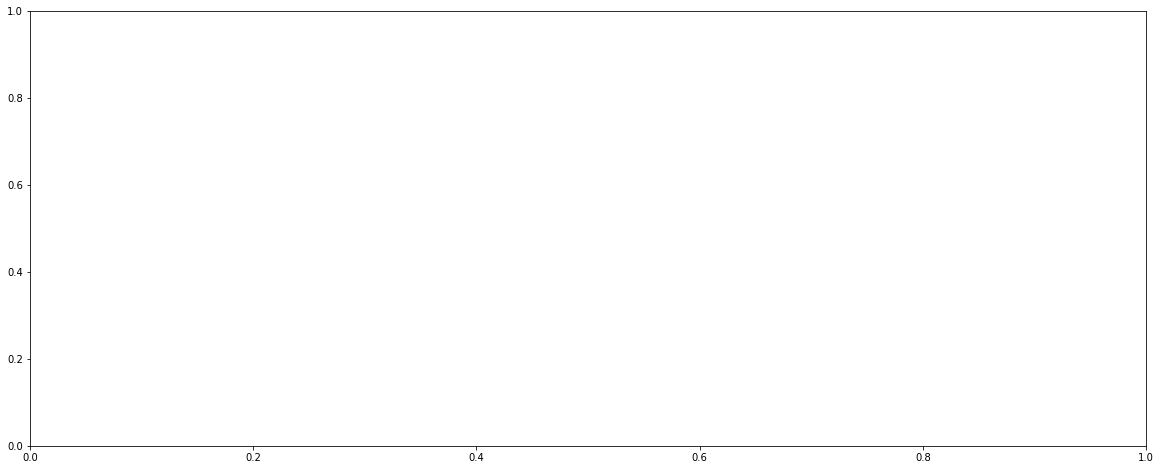

In [196]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(range(len_outbreak+1), modes, 'x', markersize = 10,linewidth = 6, color = '#fdfdfe', label = 'Mean')
plt.plot(range(len_outbreak+1), (modes+np.std(mat, axis = 0)), color ='k', lw=0.5)
plt.plot(range(len_outbreak+1), np.maximum((modes-np.std(mat, axis = 0)),0),color ='k', lw=0.5)
plt.fill_between(range(len_outbreak+1),  (modes+np.std(mat, axis = 0)), np.maximum((modes-np.std(mat, axis = 0)),0), 1, alpha=0.3, color = 'purple')
true, = ax.plot(summary[0], summary[1], 'o', color = 'black', label = 'real case data')
# leg = ax.legend(fontsize = 20)
plt.ylabel('Cumulative Infectiou Individuals', fontsize = 20)
plt.xlabel('Time, days', fontsize = 20)

blue_line = mlines.Line2D([], [], color='grey', alpha = 0.7, marker='X',
                          markersize=15, linestyle = '', linewidth = 2,  label='Mode')
plt.legend(handles=[blue_line, true], fontsize = 20)

(0, 200)

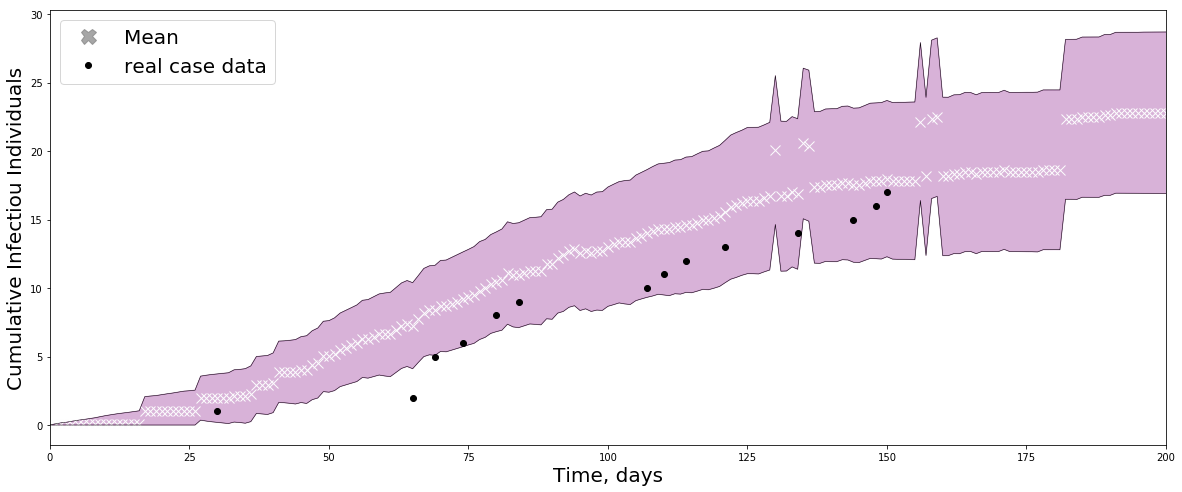

In [179]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(range(max(ma)), modes, 'x', markersize = 10,linewidth = 6, color = '#fdfdfe', label = 'Mean')
plt.plot(range(max(ma)), (modes+np.std(mat, axis = 0)), color ='k', lw=0.5)
plt.plot(range(max(ma)), np.maximum((modes-np.std(mat, axis = 0)),0),color ='k', lw=0.5)
plt.fill_between(range(max(ma)),  (modes+np.std(mat, axis = 0)), np.maximum((modes-np.std(mat, axis = 0)),0), 1, alpha=0.3, color = 'purple')
true, = ax.plot(summary[0], summary[1], 'o', color = 'black', label = 'real case data')
# leg = ax.legend(fontsize = 20)
plt.ylabel('Cumulative Infectiou Individuals', fontsize = 20)
plt.xlabel('Time, days', fontsize = 20)

blue_line = mlines.Line2D([], [], color='grey', alpha = 0.7, marker='X',
                          markersize=15, linestyle = '', linewidth = 2,  label='Mean')
plt.legend(handles=[blue_line, true], fontsize = 20)
plt.xlim([0,200])

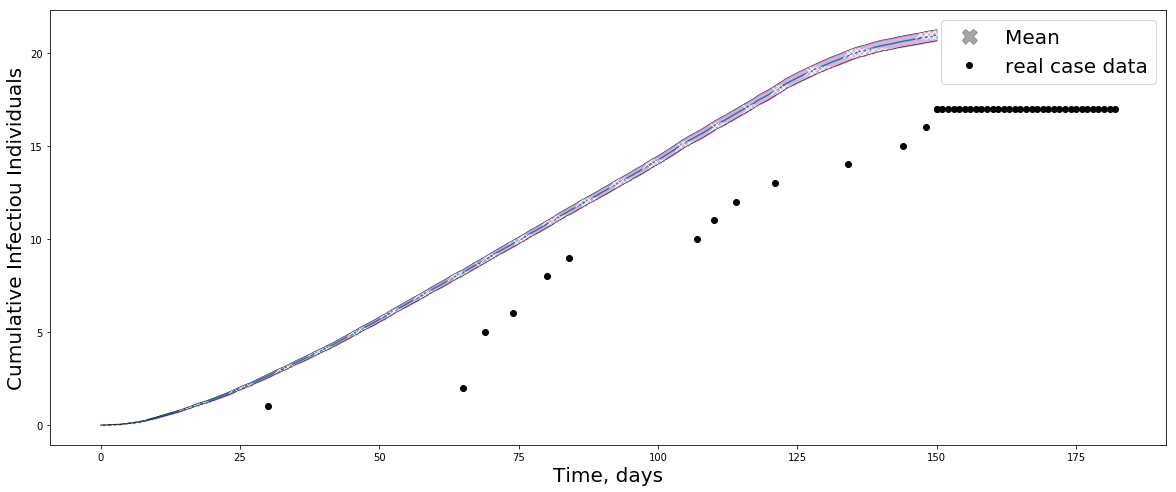

In [107]:
fig, ax = plt.subplots(figsize=(20,8))
plt.plot(range(len_outbreak+1), np.mean(mat, axis = 0))
ax.plot(range(len_outbreak+1), np.median(mat, axis = 0), 'x', markersize = 10,linewidth = 6, color = '#fdfdfe', label = 'Mean')
plt.plot(range(len_outbreak+1), high, color ='k', lw=0.5)
plt.plot(range(len_outbreak+1), np.maximum(low,0),color ='k', lw=0.5)
plt.fill_between(range(len_outbreak+1),  high, np.maximum(low,0), 1, alpha=0.3, color = 'purple')
true, = ax.plot(summary_time, summary_cum, 'o', color = 'black', label = 'real case data')
# leg = ax.legend(fontsize = 20)
plt.ylabel('Cumulative Infectiou Individuals', fontsize = 20)
plt.xlabel('Time, days', fontsize = 20)

blue_line = mlines.Line2D([], [], color='grey', alpha = 0.7, marker='X',
                          markersize=15, linestyle = '', linewidth = 2,  label='Mean')
plt.legend(handles=[blue_line, true], fontsize = 20)

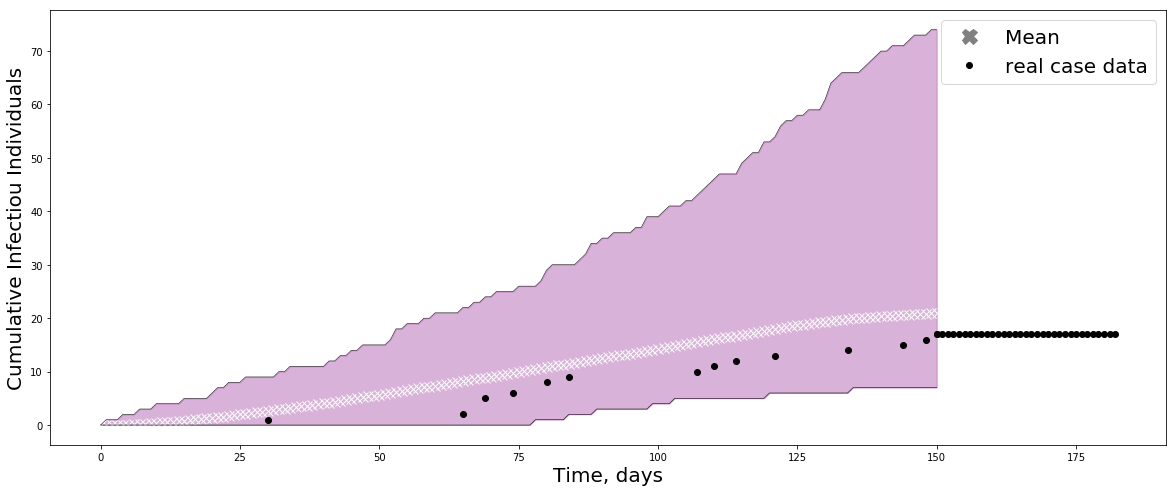

In [35]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(range(len_outbreak+1), np.mean(mat, axis = 0), 'x', markersize = 10,linewidth = 6, color = '#fdfdfe', label = 'Mean')
plt.plot(range(len_outbreak+1), (np.max(mat, axis = 0)), color ='k', lw=0.5)
plt.plot(range(len_outbreak+1), np.min(mat, axis = 0),color ='k', lw=0.5)
plt.fill_between(range(len_outbreak+1),  (np.max(mat, axis = 0)), (np.min(mat, axis = 0)), 1, alpha=0.3, color = 'purple')
true, = ax.plot(summary_time, summary_cum, 'o', color = 'black', label = 'real case data')
# leg = ax.legend(fontsize = 20)
plt.ylabel('Cumulative Infectiou Individuals', fontsize = 20)
plt.xlabel('Time, days', fontsize = 20)

blue_line = mlines.Line2D([], [], color='grey', marker='X',
                          markersize=15, linestyle = '', linewidth = 2,  label='Mean')
plt.legend(handles=[blue_line, true], fontsize = 20)

In [36]:
def returnerror(timestep, cum, sumstat1, sumstat2):
    time = [] #make results of M a step function
    cuminf = [] #steps
    for ind, x in enumerate(timestep):
        if ind < len(timestep)-1:
            time.append((timestep[ind], timestep[ind+1]))
            cuminf.append((cum[ind], cum[ind]))
        else:
            time.append((timestep[ind], timestep[ind]))
            cuminf.append((cum[ind], cum[ind]))
    time = np.array(time).flatten()
    cuminf = np.array(cuminf).flatten()
    max_inf = max(cuminf)
    max_time = math.ceil(max(time))
#     print(max_inf, max_time, βt, ɛt)
    

    summary_time = sumstat1
#         print(summary_time, max(summary_time[0]), max_time)
    summary_cum = sumstat2
    if max_time> max(summary_time):
        length1 =  np.arange(max(summary_time), max_time +1, 3)
        summary_time = np.append(summary_time, length1)
#         print(summary_time, len( length1))
        summary_cum = np.append(summary_cum, max(sumstat2)*np.ones(len(length1 )))
#         print(summary_cum)
    if max_time < max(summary_time):
        length2 = np.arange(max_time, max(summary_time)+1, 1)
        time = np.append(time,length2)
        cuminf = np.append(cuminf, max_inf*np.ones(len(length2)))
        
    inter_t = np.arange(0, max(summary_time) +1 , 1) #interpolate to daily steps
    inter_cum = np.interp(inter_t, time,cuminf) 
    return np.linalg.norm(summary_cum-inter_cum[summary_time]), inter_t, inter_cum

10.922183995727824

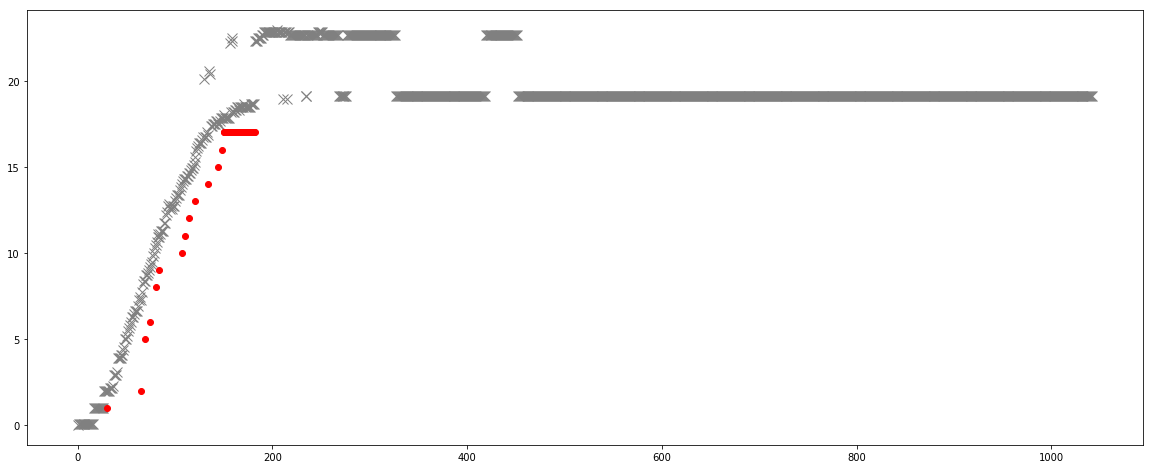

In [166]:
plt.figure(figsize = (20,8))
plt.plot(range( max(ma)), modes, 'x', markersize = 10,linewidth = 6, color = 'grey', label = 'Mean')

plt.plot(summary_time, summary_cum, 'o', color = 'red')
# plt.xlim([400,500])
error = returnerror(range(len_outbreak+1), modes, Rec_F10, Data_F10['CumsumInf'].values)[0]
error

In [170]:
nparam_density = stats.kde.gaussian_kde(mat[:,410])
x = np.linspace(-20, 60, 500)
nparam_density = nparam_density(x)

# parametric fit: assume normal distribution
loc_param, scale_param = stats.norm.fit(mat[:,410])
param_density = stats.norm.pdf(x, loc=loc_param, scale=scale_param)


/home/emma/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


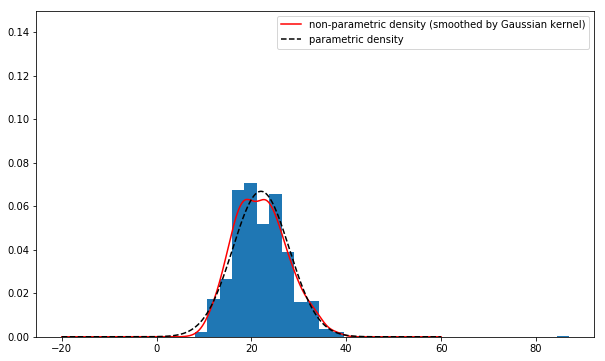

In [172]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(mat[:,410], bins=30, normed=True)
ax.plot(x, nparam_density, 'r-', label='non-parametric density (smoothed by Gaussian kernel)')
ax.plot(x, param_density, 'k--', label='parametric density')
ax.set_ylim([0, 0.15])
ax.legend(loc='best')

In [174]:
modes[440]

22.64529058116232

In [155]:
modes = []
for k in range(len(mat[0,:])):
    if k == 0:
        modes.append(0)
    else:
#         loc_param, scale_param = stats.norm.fit(mat[:,k])
#         param_density = stats.norm.pdf(x, loc=loc_param, scale=scale_param)
#         modes.append(x[np.argsort(param_density)[-1]])
        nparam_density = stats.kde.gaussian_kde(mat[:,k])
#         x = np.linspace(-20, 60, 500)
        nparam_density = nparam_density(x)
        modes.append(x[np.argsort(nparam_density)[-1]])


In [104]:
high = []
low = []
import scipy as sp
def mean_confidence_interval(data, confidence=0.9):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

In [105]:
for k in range(len(mat[0,:])):
    mean, lo, upp = mean_confidence_interval(mat[:,k])
    high.append(upp)
    low.append(lo)

In [106]:
high

[0.0,
 0.005848758507892564,
 0.021331566512897998,
 0.037740897803746815,
 0.06666141878008275,
 0.10613083066948739,
 0.14780693133129968,
 0.19816233459001803,
 0.25937143594126505,
 0.35073917504007535,
 0.4348458970315436,
 0.5264128982969206,
 0.6206028306104068,
 0.7023536810843325,
 0.792737464238372,
 0.8969443092077617,
 0.9981173936465045,
 1.117814607950826,
 1.2191227136822642,
 1.3098798925607347,
 1.422286068047726,
 1.5416125571587025,
 1.6606071718184658,
 1.7761994804130818,
 1.9116927888021038,
 2.054262550619881,
 2.1716746548946375,
 2.2947077807321192,
 2.448172418708488,
 2.5869800402650123,
 2.7292026994216303,
 2.879721758373253,
 3.023550207894921,
 3.147375650475107,
 3.3029401006701278,
 3.4567397484796256,
 3.5940607113081984,
 3.734291916553157,
 3.8923070526876327,
 4.035168083993109,
 4.18257635685393,
 4.327689958205224,
 4.479783229045636,
 4.655880978882249,
 4.8104777537909085,
 4.980295566808922,
 5.153823318065009,
 5.321094064856658,
 5.4810967050